<a href="https://colab.research.google.com/github/ChristopherMajor/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Christopher_Major__LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true positive rate):` 

You should only truly need these three values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.


 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

1) Write a function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true positive rate):

You should only truly need these three values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000.

What is the probability that a person is drunk after one positive breathalyzer test?
What is the probability that a person is drunk after two positive breathalyzer tests?
How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

![Bayes Theorem Drug Test Example](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

In [0]:
#false positive rate (pos-nonuser)
false_pos = .08
#true positive rate  (p_pos_user)
pos_user_rate= 1
#prior belief of drunk driving in population (p-user)
prior_rate = 1/1000
#the not drunk population (p-nouser)
not_drunk = 1 - prior_rate

num = (pos_user_rate*prior_rate)
den = (num + false_pos)


In [58]:
# The probabiltiy of a person who tests positive *actually* being a user:
posterior_probability = num/den
posterior_probability





0.012345679012345678

In [68]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  return (true_positive_rate*prob_drunk_prior)/((true_positive_rate*prob_drunk_prior)+(false_positive_rate*(1-prob_drunk_prior)))

#prob_drunk_given_positive(posterior_probability, false_pos, pos_user_rate)

0 0.9526026686414972


In [71]:
total = []
prob_drunk_prior= 1/1000
false_positive_rate = .08
true_positive_rate= 1

for x in range(1,10):
  total.append(prob_drunk_given_positive(prob_drunk_prior, false_positive_rate,
                                         true_positive_rate))
  prob_drunk_prior = prob_drunk_given_positive(prob_drunk_prior,
                                               false_positive_rate,
                                               true_positive_rate)
  if prob_drunk_prior > .95:
    break
total

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


In [163]:
#we can find probability of having survived the titanic
titanic = sns.load_dataset('titanic')
titanic.head()
titanic['survived'].value_counts()
total_passengers = 891
survived = 342
mean = total_passengers/survived
print(mean)
print(total_passengers)
titanic.head()
#549
type(total_passengers)

2.6052631578947367
891


int

In [146]:
survivors = titanic[titanic['survived'] == 1]
survivors = survivors.drop(columns = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])
survivors.head()

,survived
1,1
2,1
3,1
8,1
9,1


In [152]:
stats.ttest_1samp(titanic['survived'], .6173 )
# we're over 99% confident that the titanic had a 62%death rate.  

Ttest_1sampResult(statistic=-14.32151524904107, pvalue=5.121208045337609e-42)

In [104]:
def confidence_interval(data, confidence_level=.95):
  sample = np.array(data)
  x_bar = np.mean(sample)
  s = np.std(sample, ddof=1)
  n= len(sample)
  t = stats.t.ppf((1+confidence_level) / 2, n-1)
  print('sample size', n)
  standard_error= s/np.sqrt(n)
  margin_of_error = t*standard_error
  upper_bar = x_bar + margin_of_error
  lower_bar = x_bar - margin_of_error
  return(lower_bar, x_bar, upper_bar)

confidence_interval(titanic['survived'])

sample size 891


(0.3518445989680297, 0.3838383838383838, 0.4158321687087379)

In [111]:
bayesian_confidence_interval, _, _ = stats.bayes_mvs(titanic['survived'], alpha=.95)
tit_bay_conf= [.38383, .35184, .41583
tit_bay_conf

SyntaxError: ignored

IndexError: ignored

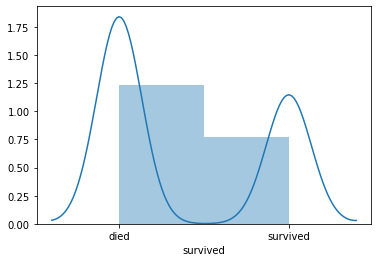

In [161]:
ax=sns.distplot(titanic['survived'], bins=2)
#plt.axvline(x=tit_bay_conf[2])
#plt.axvline(x=tit_bay_conf[0])
#plt.axvline(x=tit_bay_conf[1])
#ax.set_yticks(ticks= [0,50,100,150,200,250,300,350,400])
#ax.set_yticklabels(labels=range(0,300,50))
ax.set_xticks(ticks=[0,1])
ax.set_xticklabels(labels=['died','survived'])
#plt.axvline(x=tit_bay_conf[2])
#plt.axvline(x=tit_bay_conf[0])
#plt.axvline(x=tit_bay_conf[1])

a frequentist statistician believes the sample mean is law.   a baysian statistician will consider the sample mean against prior beliefs in their formula. A Bayesian is one who, vaguely expecting a horse, and catching a glimpse of a donkey, strongly believes he has seen a mule.  a frequentist would not factor in his expectations of what he was about to see and consider all three equal events.  

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!